In [1]:
import sys

print(sys.version)

3.7.4 (default, Oct 12 2019, 18:55:45) 
[Clang 10.0.0 (clang-1000.11.45.5)]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import geojson # installed via cmd: `conda install -c ioos geojson`
from descartes import PolygonPatch # installed via cmd: `conda install -c conda-forge descartes`
from mpl_toolkits.basemap import Basemap # installed via cmd: `conda install -c anaconda basemap`

%matplotlib inline

data_dir = "/Users/l1nk/projects/zeus/bike/data/"
csv = "Opened_Door_Collision.csv"
geojson_file = "lapd-reporting-districts.geojson"

%matplotlib inline

In [3]:
door_collision_df = pd.read_csv(data_dir + csv, dtype={'Date Occurred': str})

with open(data_dir + geojson_file) as json_file:
    lapd_reporting_district_GJ = geojson.load(json_file)

In [4]:
door_collision_df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
0,191712565,07/09/2019,07/09/2019,1720,17,Devonshire,1785,997,TRAFFIC COLLISION,3603 3008 3037 3025 3103 3401 3701 4026,29.0,M,W,101,STREET,PRAIRIE ST,RESEDA BL,"(34.2391, -118.5361)"
1,190116470,06/20/2019,06/20/2019,1140,1,Central,185,997,TRAFFIC COLLISION,3603 0605 3101 3401 3701 4001 3006 3024 3008,28.0,M,W,101,STREET,9TH ST,MAIN ST,"(34.0411, -118.2545)"
2,190213124,06/15/2019,06/14/2019,2215,2,Rampart,233,997,TRAFFIC COLLISION,0605 3101 3401 3701 4027 3008 3603 3025,28.0,M,W,101,STREET,RAMPART BL,3RD ST,"(34.0663, -118.2789)"
3,191112079,06/15/2019,06/14/2019,1840,11,Northeast,1115,997,TRAFFIC COLLISION,0605 3101 3401 3701 4011 3030 3036 3008 3603,73.0,M,W,101,STREET,N MAYWOOD AV,FAIR PARK AV,"(34.1353, -118.211)"
4,191111625,06/06/2019,06/06/2019,710,11,Northeast,1162,997,TRAFFIC COLLISION,0605 3101 3401 3701 4024 3008 3036 3603,39.0,M,H,101,STREET,VERMONT AV,SANTA MONICA BL,"(34.0909, -118.2917)"


In [5]:
grouped_by_reporting_district = door_collision_df.groupby(['Reporting District'])
map_DF = grouped_by_reporting_district.count().add_suffix('_Count').reset_index()

In [19]:
map_DF.head()

,Reporting District,DR Number_Count,Date Reported_Count,Date Occurred_Count,Time Occurred_Count,Area ID_Count,Area Name_Count,Crime Code_Count,Crime Code Description_Count,MO Codes_Count,Victim Age_Count,Victim Sex_Count,Victim Descent_Count,Premise Code_Count,Premise Description_Count,Address_Count,Cross Street_Count,Location_Count
0,111,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,118,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,132,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,135,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,138,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


10.0
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name

Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Cri

Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Cri

Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Cri

Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Cri

Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Crime Code_Count, dtype: int64)
Series([], Name: Cri

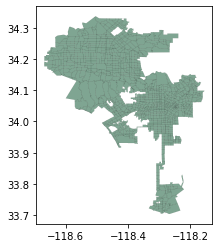

In [18]:
max_accident_count = float(map_DF['Crime Code_Count'].max())

print(max_accident_count)

fig = plt.figure() 
ax = fig.gca()

for district in lapd_reporting_district_GJ['features']:
    reporting_district = str(district['properties']['external_id'])
    try:
        
        print(map_DF.loc[map_DF['Reporting District'] == reporting_district,'Crime Code_Count'])
        
        accident_count = float(map_DF.loc[map_DF['Reporting District'] == reporting_district, 
                                          'Crime Code_Count'].values[0])
        print(accident_count)
        color = ( accident_count / max_accident_count , .3, .15)
    except IndexError:
        color = (0, .3, .15)
        #print(reporting_district)
    
    
    poly = district['geometry']
    ax.add_patch(PolygonPatch(poly, fc=color, ec='black', alpha=0.5, zorder=2, linewidth=.1 ))
    
ax.axis('scaled')    
plt.savefig('/Users/l1nk/projects/zeus/bike/output/collisions.png', dpi=1000)